<a href="https://colab.research.google.com/github/sachin2000k/CodeDown-Projects/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#working on CIFAR-10

In [0]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models, optimizers

In [0]:
IMG_CHANNELS = 3 #(RBG)
IMG_ROWS = 32
IMG_COLS = 32

BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)

- 32 convolutional filters (3X3)
- output = 32X32, activation = relu
- max pooling(2X2)
- dropout = 25%
--
- dense network with 512 units, activation = Relu
- dropout = 50%
- softmax layer with 10 classes 

In [0]:
def build(input_shape, classes):
  model = models.Sequential()
  model.add(layers.Convolution2D(32,(3,3),activation ='relu', input_shape = input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.25))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(classes, activation = 'softmax'))
  return model

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
X_train = X_train.reshape((50000, 32, 32, 3))
X_test = X_test.reshape((10000, 32,32,3))
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [7]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [8]:
model = build(input_shape = INPUT_SHAPE, classes = CLASSES)
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [0]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=('./content/logs'))]

In [10]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs= EPOCHS, validation_split = VALIDATION_SPLIT,
                    verbose = VERBOSE, callback = callbacks)

Epoch 1/20
313/313 [==============================] - 5s 17ms/step - loss: 1.7241 - accuracy: 0.3896 - val_loss: 1.3871 - val_accuracy: 0.5145
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 1.3745 - accuracy: 0.5176 - val_loss: 1.3322 - val_accuracy: 0.5376
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 1.2469 - accuracy: 0.5623 - val_loss: 1.2106 - val_accuracy: 0.5793
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 1.1557 - accuracy: 0.5965 - val_loss: 1.1207 - val_accuracy: 0.6125
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 1.0798 - accuracy: 0.6226 - val_loss: 1.1703 - val_accuracy: 0.6023
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 1.0117 - accuracy: 0.6470 - val_loss: 1.0882 - val_accuracy: 0.6161
Epoch 7/20
313/313 [==============================] - 5s 16ms/step - loss: 0.9588 - accuracy: 0.6676 - val_loss: 1.0843 - val_accuracy: 0.6202

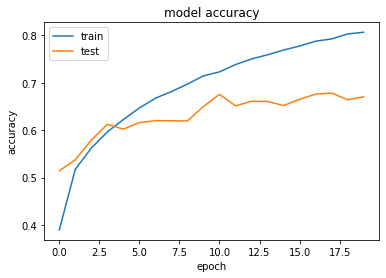

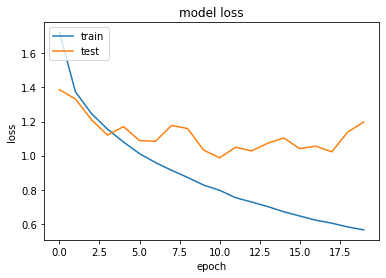

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("Test score: ", score[0])
print("Test accuracy", score[1])

79/79 [==============================] - 1s 6ms/step - loss: 1.2056 - accuracy: 0.6529
Test score:  1.2056312561035156
Test accuracy 0.652899980545044


#Improving the CIFAR-10 performance with a deeper network
- 1st Module: CONV + CONv + MaxPool + DropOut
- 2nd Module: CONV + CONV + MaxPool + DropOut
- 3rd Moudule: CONV + CONV + MaxPool + DropOut

In [17]:
X_train.shape[1:]

(32, 32, 3)

In [0]:
def build_model2():
  model = models.Sequential()
  #1st Module
  model.add(layers.Conv2D(32,(3,3),padding = 'same', 
                          input_shape = x_train.shape[1:], activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size = (2,2)))
  model.add(layers.Dropout(0.2))

  #2nd Module
  model.add(layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size = (2,2)))
  model.add(layers.Dropout(0.3))

  #3rd Module
  model.add(layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.4))

  # dense
  model.add(layers.Flatten())
  model.add(layers.Dense(NUM_CLASSES, activation = 'softmax'))
  
  model.summary()
  return model


In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [0]:
EPOCHS = 50
NUM_CLASSES = 10

def load_data():
  (x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # normalise
  mean = np.mean(x_train,axis = (0,1,2,3))
  std = np.std(x_train, axis = (0,1,2,3))
  x_train = (x_train-mean)/(std + 1e-7)
  x_test = (x_test-mean)/(std + 1e-7)

  y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
  y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

  return x_train, y_train, x_test, y_test

In [0]:
(x_train, y_train, x_test, y_test) = load_data()

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
model2 = build_model2()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [34]:
model2.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics = ['accuracy'])
batch_size = 64
history2 = model2.fit(x_train, y_train, batch_size= batch_size, 
                     epochs = EPOCHS, validation_data = (x_test, y_test))

Epoch 1/50
782/782 [==============================] - 28s 36ms/step - loss: 1.7381 - accuracy: 0.4705 - val_loss: 1.2428 - val_accuracy: 0.6190
Epoch 2/50
782/782 [==============================] - 27s 35ms/step - loss: 1.0382 - accuracy: 0.6539 - val_loss: 1.0081 - val_accuracy: 0.6591
Epoch 3/50
782/782 [==============================] - 27s 35ms/step - loss: 0.8327 - accuracy: 0.7169 - val_loss: 0.9106 - val_accuracy: 0.7067
Epoch 4/50
782/782 [==============================] - 27s 35ms/step - loss: 0.7122 - accuracy: 0.7560 - val_loss: 0.6592 - val_accuracy: 0.7753
Epoch 5/50
782/782 [==============================] - 27s 35ms/step - loss: 0.6323 - accuracy: 0.7786 - val_loss: 0.6046 - val_accuracy: 0.7943
Epoch 6/50
782/782 [==============================] - 27s 35ms/step - loss: 0.5739 - accuracy: 0.8013 - val_loss: 0.6064 - val_accuracy: 0.7969
Epoch 7/50
782/782 [==============================] - 27s 35ms/step - loss: 0.5259 - accuracy: 0.8161 - val_loss: 0.6130 - val_accuracy:

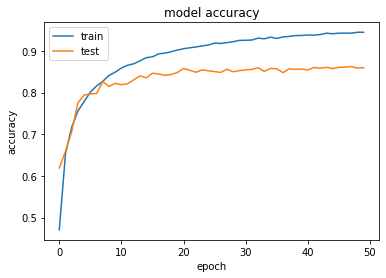

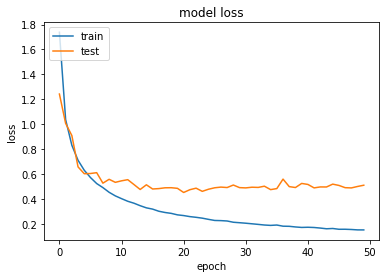

In [37]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
score = model2.evaluate(x_test, y_test, batch_size = batch_size)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

157/157 [==============================] - 1s 9ms/step - loss: 0.5125 - accuracy: 0.8599
Test score:  0.5124581456184387
Test accuracy:  0.8598999977111816


In [0]:
#saving model
model_json = model2.to_json()
with open('model2.json', 'w') as json_file:
  json_file.write(model_json)

model2.save_weights('cifar10.h5')

#IMPROVING PERFORMANCE WITH DATA AUGMENTATION
- rotation, rescaling, horizontal/vertical flip, zooming, channel shift

In [0]:
datagen = ImageDataGenerator( rotation_range=30,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             horizontal_flip = True,)
datagen.fit(x_train)

In [0]:
batch_size = 64
history3 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                     epochs = EPOCHS, verbose = 1,
                     validation_data = (x_test, y_test))


Epoch 1/50
  59852/Unknown - 3196s 53ms/step - loss: 0.5361 - accuracy: 0.8159

In [0]:
#saving model
model_json = model2.to_json()
with open('model2.json', 'w') as json_file:
  json_file.write(model_json)

model2.save_weights(CIFAR10.h5)

In [0]:
scores = model2.evaluate(x_test, y_test, batch_size = 128, verbose=1)
print("Test score: ", scores[0])
print('Test accuracy: ', scores[1])

#PREDICTING WITH CIFAR-10

In [0]:
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

model_architecture = '/content/model2.json'

In [0]:
model_weights = '/content/cifar10.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

In [0]:
img_names = ['/content/cat.jpg','/content/dog.png']

In [0]:
from PIL import Image